<a href="https://colab.research.google.com/github/AzisilhamK463/PCVK_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PERTEMUAN MINGGU 5

NAMA : AZIS ILHAM KURNIAWAN

NIM : 2141720145

In [1]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Membuat Gamma correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


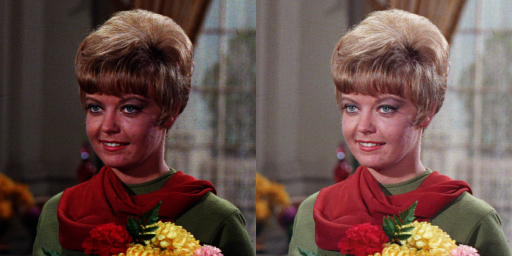

In [5]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

img_ori = cv2.imread('/content/drive/MyDrive/dataset/female.tiff')

img_gamma = np.power((img_ori / 255), 1/gamma)
img_gamma = (img_gamma * 255).astype(np.uint8)

final_frame=cv2.hconcat ((img_ori,img_gamma))
cv2_imshow(final_frame)

2. Membuat Simulasi Image Depth

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 5


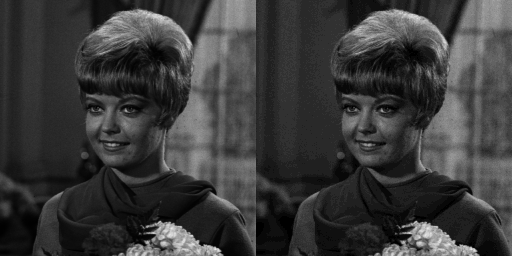

In [13]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, not a number')

level = 255 / (pow(2,bit_depth)-1)
grayscale = cv2.imread('/content/drive/MyDrive/dataset/female.tiff', cv2.IMREAD_GRAYSCALE)

depth_image = np.round(grayscale/level) * level
depth_image = depth_image.astype(np.uint8)

final_frame=cv2.hconcat ((grayscale,depth_image))
cv2_imshow(final_frame)

3. Membuat modul Average Denoising

 Simulasi Average Denoising 
----------------------------------
Masukkan jumlah citra di average : 10
29.00437189378713


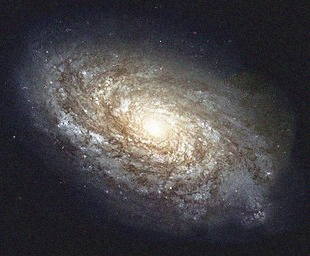

In [18]:
print(' Simulasi Average Denoising ')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan jumlah citra di average : '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/dataset/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka gambar tidak memiliki noise sama sekali
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

4. Membuat Image Masking

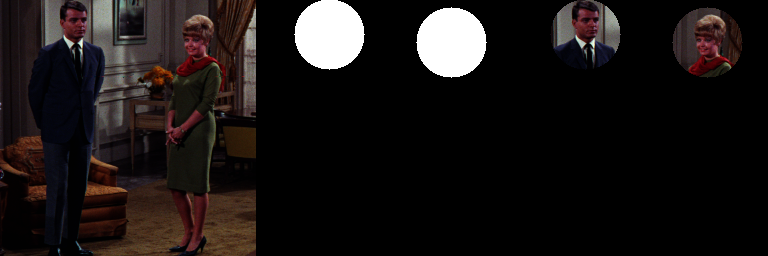

In [47]:
couple_img = cv2.imread('/content/drive/MyDrive/dataset/couple.tiff')

center1 = (73, 34) # koordinat x, y
radius1 = 35
center2 = (195, 42)
radius2 = 35

mask = np.zeros_like(couple_img)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

# not_couple_img = cv2.bitwise_not(couple_img)
# not_mask = cv2.bitwise_not(mask)

masked_image = cv2.bitwise_and(couple_img, mask)
# masked_image = cv2.bitwise_and(not_couple_img, not_mask)

final_frame = cv2.hconcat((couple_img, mask,masked_image))
cv2_imshow(final_frame)